In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import missingno as msno
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

import math
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')


In [2]:
prices = pd.read_csv('prices.csv')

In [3]:
prices.head()

,Unnamed: 0,AAPL,MSFT,NVDA,GOOG,GOOGL,AMZN,TSM,LLY,AVGO,...,BN,BDX,TGT,APO,AON,STLA,CSX,APD,MRVL,MSI
0,2012-01-03,12.378491,21.026286,0.327909,16.244059,16.321109,8.7945,9.171447,30.991968,21.467617,...,7.179850,60.328468,36.753244,5.221550,41.739341,1.726558,5.790389,59.041012,12.102554,37.702138
1,2012-01-04,12.396632,21.240113,0.322176,16.544838,16.623314,8.9605,9.199429,30.918089,21.037967,...,7.154136,59.115321,36.158291,5.413700,41.089086,1.837578,5.889533,58.788786,11.948376,37.300118
2,2012-01-05,12.546302,21.683604,0.324010,16.472690,16.550825,8.7970,9.227413,29.130244,20.724848,...,7.110417,58.397038,33.997999,5.434587,40.403690,1.837578,6.018148,59.102349,12.393766,37.259905
3,2012-01-06,12.692039,21.802395,0.337081,16.398553,16.476335,8.9035,9.283379,29.529179,20.688437,...,7.226140,58.141646,34.571708,5.551549,40.843035,1.837578,6.109249,59.197775,13.087545,37.436814
4,2012-01-09,12.865290,22.214205,0.333641,16.083842,16.160131,9.1380,9.199431,29.507018,21.336536,...,7.177281,58.428953,34.720458,5.839781,40.561848,1.883518,6.119968,58.761542,13.601451,37.324243


In [4]:
print("Original dataset size: ", len(prices))
print("Original number of stocks: ", len((prices.columns)) - 1) 

Original dataset size:  3018
Original number of stocks:  177


In [5]:
prices.rename(columns = {'Unnamed: 0':'date'}, inplace = True)

In [6]:
# checking dates our data consists of
print("data is from %s to %s" %((prices['date'].min()), (prices['date'].max()))) 

data is from 2012-01-03 to 2023-12-29


In [7]:
# importing datetime module 
from datetime import date
import time
# newdate1 = time.strptime(date1, "%d/%m/%Y")
# newdate2 = time.strptime(date2, "%d/%m/%Y"
# newdate1 < newdate2

In [8]:
prices

,date,AAPL,MSFT,NVDA,GOOG,GOOGL,AMZN,TSM,LLY,AVGO,...,BN,BDX,TGT,APO,AON,STLA,CSX,APD,MRVL,MSI
0,2012-01-03,12.378491,21.026286,0.327909,16.244059,16.321109,8.794500,9.171447,30.991968,21.467617,...,7.179850,60.328468,36.753244,5.221550,41.739341,1.726558,5.790389,59.041012,12.102554,37.702138
1,2012-01-04,12.396632,21.240113,0.322176,16.544838,16.623314,8.960500,9.199429,30.918089,21.037967,...,7.154136,59.115321,36.158291,5.413700,41.089086,1.837578,5.889533,58.788786,11.948376,37.300118
2,2012-01-05,12.546302,21.683604,0.324010,16.472690,16.550825,8.797000,9.227413,29.130244,20.724848,...,7.110417,58.397038,33.997999,5.434587,40.403690,1.837578,6.018148,59.102349,12.393766,37.259905
3,2012-01-06,12.692039,21.802395,0.337081,16.398553,16.476335,8.903500,9.283379,29.529179,20.688437,...,7.226140,58.141646,34.571708,5.551549,40.843035,1.837578,6.109249,59.197775,13.087545,37.436814
4,2012-01-09,12.865290,22.214205,0.333641,16.083842,16.160131,9.138000,9.199431,29.507018,21.336536,...,7.177281,58.428953,34.720458,5.839781,40.561848,1.883518,6.119968,58.761542,13.601451,37.324243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,2023-12-22,194.931260,372.318708,49.188655,141.968444,140.608629,153.770004,102.191314,571.044031,1123.196602,...,39.648489,242.175757,137.468494,91.185929,287.831948,21.974801,34.316668,269.036229,60.385280,311.120306
3014,2023-12-26,193.363270,373.633893,48.961680,142.817476,141.427685,153.559998,102.866441,567.536139,1119.472383,...,39.847729,241.064676,138.020575,90.947801,289.156050,21.890571,34.396128,269.726732,60.544977,307.301210
3015,2023-12-27,192.244692,372.328655,49.504611,142.667655,141.427679,153.559998,104.296102,568.532717,1131.182557,...,40.315943,240.628169,138.937417,91.979710,287.792124,21.984159,34.535185,270.476329,61.383384,308.288415
3016,2023-12-28,193.892582,374.002510,49.636596,141.688775,140.618617,153.720001,104.246466,579.973093,1126.890823,...,40.086819,241.034917,140.051449,92.485752,288.708047,22.012238,34.485525,271.877025,61.273591,310.691508


In [9]:
# stock_prices.columns = prices

In [10]:
#get the pivot table, with stock permno as index and datetime as columns
df_price = prices.set_index('date')
# df_price = pd.pivot_table(prices, index = 'symbol', columns = 'date')
#last step, delete stocks with more than half nan price for clustering
# df_price = df_price.dropna(thresh = len(df_price.columns)//2)
# df_price = df_price.fillna(method = 'ffill', axis = 1, limit = 5)

In [11]:
df_price = df_price.T

In [12]:
print("\nNumber of stocks (rows):", len(df_price))
print("\nNumber of days (columns):", len(df_price.columns))


Number of stocks (rows): 177

Number of days (columns): 3018


In [13]:
df_price.fillna(df_price.mean(), inplace = True)

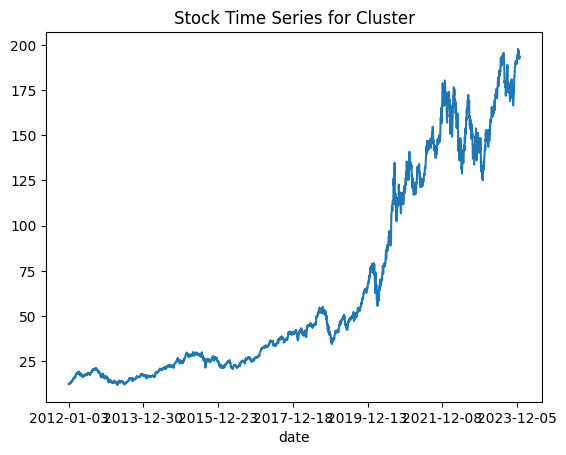

In [14]:
# plotting sample of a stock
df_price.loc['AAPL'][:20170101].plot(title='Stock Time Series for Cluster')
plt.show()

In [15]:
df_price

date,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-09,2012-01-10,2012-01-11,2012-01-12,2012-01-13,2012-01-17,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
AAPL,12.378491,12.396632,12.546302,12.692039,12.865290,12.877683,12.780021,12.767931,12.689922,12.825985,...,197.278264,195.840092,195.910021,196.649065,195.850088,194.931260,193.363270,192.244692,193.892582,193.652887
MSFT,21.026286,21.240113,21.683604,21.802395,22.214205,22.119175,21.723195,22.071655,22.119180,22.491396,...,365.513585,368.104095,370.136636,373.633885,371.202758,372.318708,373.633893,372.328655,374.002510,374.630212
NVDA,0.327909,0.322176,0.324010,0.337081,0.333641,0.338457,0.329055,0.326074,0.321029,0.319654,...,48.187781,49.393627,49.417622,49.648589,48.804703,49.188655,48.961680,49.504611,49.636596,49.806573
GOOG,16.244059,16.544838,16.472690,16.398553,16.083842,15.667131,15.511641,15.703702,15.580305,15.722610,...,132.768914,133.707841,137.843147,140.170488,140.609996,141.968444,142.817476,142.667655,141.688775,140.520090
GOOGL,16.321109,16.623314,16.550825,16.476335,16.160131,15.741444,15.585216,15.778187,15.654205,15.797185,...,131.469111,132.477954,136.683132,138.810694,139.330091,140.608629,141.427685,141.427679,140.618617,139.469933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STLA,1.726558,1.837578,1.837578,1.837578,1.883518,1.852892,1.898831,1.883517,1.875861,1.875861,...,21.993520,21.974802,21.740828,21.637880,21.731468,21.974801,21.890571,21.984159,22.012238,21.956083
CSX,5.790389,5.889533,6.018148,6.109249,6.119968,6.256623,6.248585,6.320933,6.251266,6.194994,...,33.532005,33.949167,34.078293,34.078291,34.207410,34.316668,34.396128,34.535185,34.485525,34.455721
APD,59.041012,58.788786,59.102349,59.197775,58.761542,59.334093,59.306843,60.322427,60.758650,61.419816,...,266.599877,269.854923,269.509711,267.901908,266.540685,269.036229,269.726732,270.476329,271.877025,270.654930
MRVL,12.102554,11.948376,12.393766,13.087545,13.601451,13.712799,13.190327,13.036152,12.933371,12.839155,...,59.536893,59.397153,59.506950,59.197541,59.137650,60.385280,60.544977,61.383384,61.273591,61.273595


In [16]:
# converting date from date format to integers
def strip_time(num):
    s = str(num).split('-')
    z = ""
    for x in s:
        z += x
    return int(z)

# prices['date'] = np.vectorize(strip_time)(prices['date'])
# print(str(date(2000, 1, 1)).split('-'))

In [17]:
# taking data from 2012 to 2017 as training data and 2018 to 2023 as testing data
prices_train = df_price.T[(np.vectorize(strip_time)(df_price.T.index) >= (20120101)) & (np.vectorize(strip_time)(df_price.T.index) <= (20171231))].T
prices_test = df_price.T[(np.vectorize(strip_time)(df_price.T.index) >= 20180101) & (np.vectorize(strip_time)(df_price.T.index) <= 20231231)].T

In [18]:
print(prices_train.shape, prices_test.shape)

(177, 1509) (177, 1509)


In [19]:
# calculating percentage change with step size 1 
df_ret = prices_train.T.pct_change().T

In [20]:
df_ret = df_ret.dropna(axis = 1)
df_ret.head()

date,2012-01-04,2012-01-05,2012-01-06,2012-01-09,2012-01-10,2012-01-11,2012-01-12,2012-01-13,2012-01-17,2012-01-18,...,2017-12-15,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-26,2017-12-27,2017-12-28,2017-12-29
AAPL,0.001466,0.012073,0.011616,0.013650,0.000963,-0.007584,-0.000946,-0.006110,0.010722,0.006506,...,0.007135,0.007199,0.000858,-0.000914,-0.004003,0.002928,-0.022212,-0.004098,0.005291,-0.002807
MSFT,0.010170,0.020880,0.005478,0.018888,-0.004278,-0.017902,0.016041,0.002153,0.016828,-0.003169,...,-0.001990,0.021816,-0.008838,-0.001737,-0.001740,-0.007554,-0.001054,0.003986,0.002919,-0.003143
NVDA,-0.017482,0.005694,0.040340,-0.010204,0.014433,-0.027778,-0.009059,-0.015471,-0.004286,-0.011478,...,0.012532,0.026295,0.022360,0.000912,-0.003844,-0.012897,-0.007047,0.020049,0.006247,0.001666
GOOG,0.018516,-0.004361,-0.004501,-0.019191,-0.025909,-0.009925,0.012382,-0.007858,0.009134,-0.008465,...,0.009196,0.010876,0.008555,-0.003181,-0.006373,-0.003606,-0.002865,-0.000643,-0.005476,-0.004641
GOOGL,0.018516,-0.004361,-0.004501,-0.019191,-0.025909,-0.009925,0.012382,-0.007858,0.009134,-0.008465,...,0.007854,0.011910,0.006103,-0.001939,-0.005116,-0.005012,-0.001271,-0.001909,-0.004078,-0.006364


In [21]:
# selecting number of principal components and fitting our dataframe to select 50 features 
N_PRIN_COMPONENTS = 50
pca1 = PCA(n_components = N_PRIN_COMPONENTS)
pca1.fit(df_ret.T)

PCA(n_components=50)

In [22]:
pca1.components_.T.shape

(177, 50)

In [23]:
# features reduced from 2766 to 50
reduced_price = pd.DataFrame(data = pca1.components_.T, index = df_ret.index)
reduced_price = reduced_price.add_prefix("P")
reduced_price.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49
AAPL,-0.079859,-0.048346,0.030551,0.009914,-0.032859,-0.050631,-0.063967,-0.062248,-0.029422,-0.021331,...,-0.435327,-0.052259,-0.180066,-0.039649,-0.027934,0.179006,-0.050329,0.026760,0.126488,0.065142
MSFT,-0.071280,-0.045246,-0.000439,-0.003642,-0.016061,-0.058363,-0.008877,-0.034054,-0.034077,-0.052812,...,0.141996,-0.123255,0.183660,-0.058601,0.021991,0.013747,-0.114318,-0.082554,0.028464,0.102062
NVDA,-0.097654,-0.080199,0.226101,-0.014535,-0.059698,0.008609,-0.047838,-0.119733,-0.056405,-0.089518,...,-0.000968,-0.119341,-0.266215,0.106687,-0.003493,-0.070978,-0.001969,0.018017,0.131756,0.098271
GOOG,-0.071863,-0.074912,-0.018190,0.047155,0.005811,-0.039934,-0.050845,-0.012109,-0.035243,-0.019975,...,-0.015746,-0.038115,0.157273,-0.117589,-0.058661,-0.297905,0.110429,-0.016774,-0.094472,0.060122
GOOGL,-0.071837,-0.074757,-0.020032,0.046258,0.004995,-0.039047,-0.050292,-0.011157,-0.035187,-0.024235,...,-0.025131,-0.031635,0.152650,-0.114004,-0.062250,-0.298428,0.115722,-0.019158,-0.100973,0.052035


In [24]:
X = reduced_price

In [25]:
train_data = preprocessing.StandardScaler().fit_transform(reduced_price)
print(train_data.shape)

(177, 50)


In [26]:
print(train_data)

[[-3.59676839e-01 -5.23900953e-01  5.94929430e-01 ...  3.47889702e-01
   1.67211046e+00  8.77916328e-01]
 [ 1.03053123e-04 -4.82341839e-01  1.75876855e-01 ... -1.10648593e+00
   3.67908290e-01  1.36913533e+00]
 [-1.10602708e+00 -9.50942643e-01  3.23919477e+00 ...  2.31562418e-01
   1.74219538e+00  1.31869810e+00]
 ...
 [ 2.97101544e-01  4.30284691e-02 -2.03802822e-01 ... -7.15027955e-01
  -5.57455556e-01  1.01665827e+00]
 [-1.04104244e+00 -6.78705480e-01  2.22706533e+00 ...  1.28816015e+00
   2.76912685e-01  4.90832618e-01]
 [ 6.97251930e-01 -3.30133319e-01  1.88429986e-01 ... -3.44130178e-01
   1.34607137e+00  6.57986577e-01]]


In [27]:
clf = DBSCAN(eps=1.8, min_samples = 3, n_jobs = 1)
print(clf)

DBSCAN(eps=1.8, min_samples=3, n_jobs=1)


In [28]:
clf.fit(train_data)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters discovered: %d" % n_clusters_)

Clusters discovered: 2


In [29]:
clustered = clf.labels_
clustered_series = pd.Series(index = X.index, data = clustered.flatten())
clustered_series_all = pd.Series(index = X.index, data = clustered.flatten())
clustered_series = clustered_series[clustered_series != 1]

In [30]:
cluster_size_limit = 100
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts > 1) & (counts <= cluster_size_limit)]
print("Clusters formed: %d" % len(ticker_count_reduced))
print("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 1
Pairs to evaluate: 12


In [31]:
#plot multidimension to 2d
X_tsne = TSNE(learning_rate = 1000, perplexity = 25, random_state = 1337).fit_transform(X)

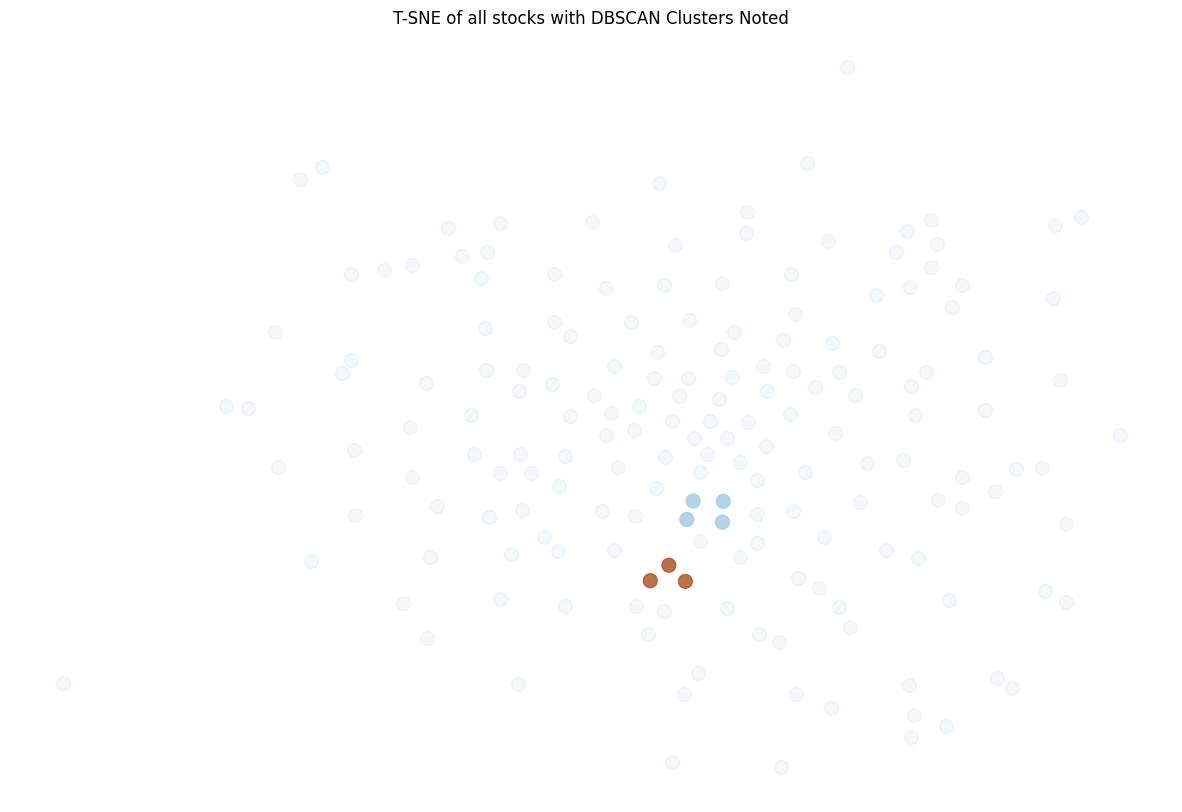

In [32]:
plt.figure(1, facecolor = 'white', figsize = (15, 10))
plt.clf()
plt.axis('off')

plt.scatter(X_tsne[(labels!=-1), 0], X_tsne[(labels!=-1), 1], s = 100, alpha = 0.85, c = labels[labels!=-1], cmap = cm.Paired)
plt.scatter(X_tsne[(clustered_series_all==-1).values, 0], X_tsne[(clustered_series_all==-1).values, 1], s = 100, alpha = 0.05)
plt.title('T-SNE of all stocks with DBSCAN Clusters Noted')
plt.savefig('T-SNE_plot_for_stock_clusters.png')
plt.show()

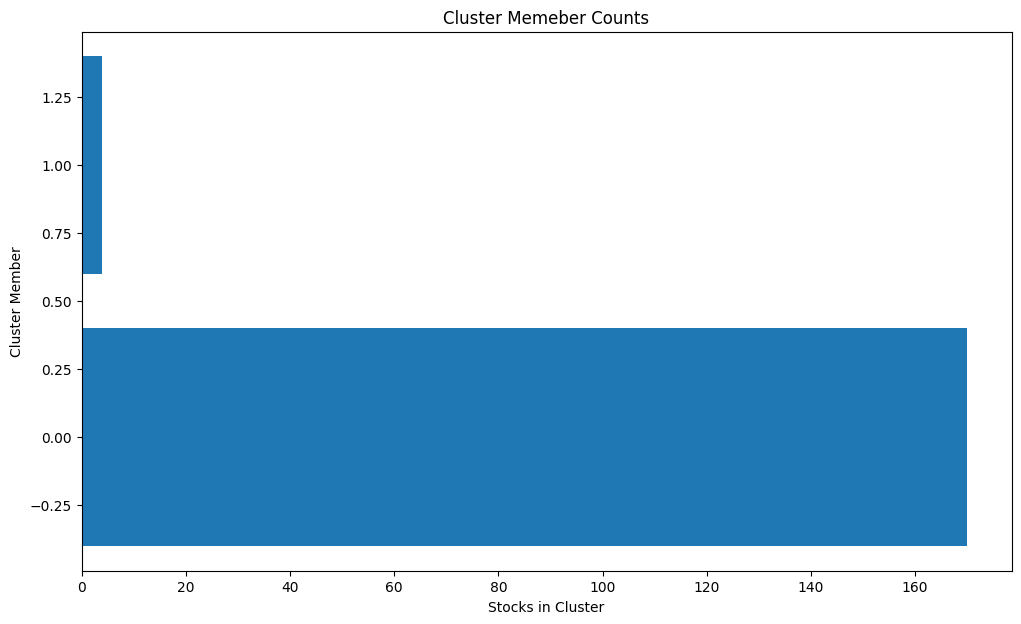

In [38]:
plt.figure(figsize = (12, 7))
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title("Cluster Memeber Counts")
plt.xlabel('Stocks in Cluster')
plt.ylabel("Cluster Member")
plt.savefig('cluster_member_counts.png')
plt.show()

In [39]:
counts = clustered_series.value_counts()
clusters_viz_list = list(counts[(counts < 100) & (counts > 1)].index)[::-1]
print(clusters_viz_list)

[0]


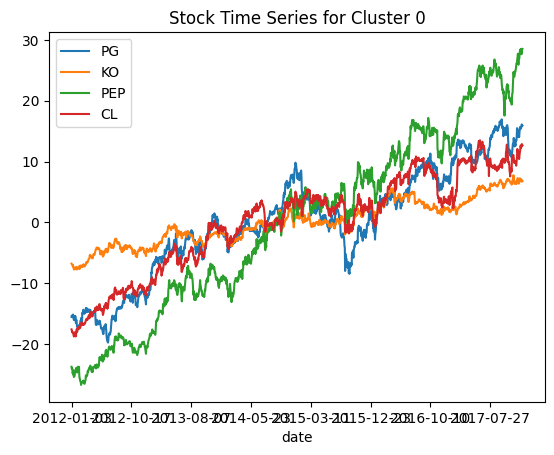

In [40]:
for c in clusters_viz_list:
    stocks = list(clustered_series[clustered_series==c].index)
    means = (prices_train.loc[stocks,].T.mean())
    data = (prices_train.loc[stocks,]).T.sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % c)
    plt.savefig('stock_price_clsuter_'+str(c)+'.png')
    plt.show()

In [41]:
clustered_series[clustered_series == 0]

PG     0
KO     0
PEP    0
CL     0
dtype: int64

In [42]:
# taken from 
def Cointegration(cluster, significance, start_day, end_day, Price):
    pair_coin = []
    p_value = []
    n = cluster.shape[0]
    keys = cluster.keys()
    for i in range(n):
        for j in range(i+1,n):
            asset_1 = Price.loc[keys[i], start_day:end_day]
            asset_2 = Price.loc[keys[j], start_day:end_day]
            results = sm.OLS(asset_1, asset_2).fit()
            predict = results.predict(asset_2)
            error = asset_1 - predict
            ADFtest = ts.adfuller(error)
            if ADFtest[1] < significance:
                pair_coin.append([keys[i], keys[j]])
                p_value.append(ADFtest[1])
    return p_value, pair_coin

In [43]:
# taken from 
import heapq
import operator
def PairSelection(clustered_series, significance, start_day, end_day, Price, E_selection = False):
    Opt_pairs = []   # to get best pair in cluster i
    
    if E_selection == True: # select one pair from each cluster
        for i in clusters_viz_list:
            cluster = clustered_series[clustered_series == i]
            keys = cluster.keys()
            result = Cointegration(cluster, significance, start_day, end_day, Price)
            if len(result[0]) > 0:
                if np.min(result[0]) < significance:
                    index = np.where(result[0] == np.min(result[0]))[0][0]
                    Opt_pairs.append([result[1][index][0], result[1][index][1]]) 
    else:
        p_value_contval = []
        pairs_contval = []
        for i in clusters_viz_list:
            cluster = clustered_series[clustered_series == i]
            keys = cluster.keys()
            result = Cointegration(cluster, significance, start_day, end_day, Price)
            if len(result[0]) > 0:
                p_value_contval += result[0]
                pairs_contval += result[1]
        
        Opt_pair_index = heapq.nsmallest(20, range(len(p_value_contval)), key=p_value_contval.__getitem__)
        Opt_pairs = operator.itemgetter(*Opt_pair_index)(pairs_contval)
    return Opt_pairs

In [44]:
significance = 0.05
start_date = '20120101'
end_date = "20171231"

opt_pairs2 = PairSelection(clustered_series, significance, start_date, end_date, prices_train, E_selection = True)
print("Number of clusters: ",len(ticker_count_reduced))


Number of clusters:  1


In [45]:
print("Number of cointegrated pairs: ",len(opt_pairs2))
print("Pairs with lowest p-value among all the clusters:")
opt_pairs2

Number of cointegrated pairs:  1
Pairs with lowest p-value among all the clusters:


[['KO', 'CL']]

In [46]:
#preview of cointegrated pairs
def plot_pairs(asset1, asset2, start_date, end_date, df_price):
    
    price1 = df_price.loc[asset1, start_date:end_date]
    price2 = df_price.loc[asset2, start_date:end_date]
    
    fig = plt.figure(figsize = (10,7))
    ax = fig.add_subplot(111)

    ax.set_xlabel(asset1)
    ax.set_ylabel(asset2)
    
    ax.scatter(price1[0:252], price2[0:252], color = 'b', label = 'year 2012')
    ax.scatter(price1[252:504], price2[252:504], color = 'g', label = 'year 2013')
    ax.scatter(price1[504:756], price2[504:756], color = 'r', label = 'year 2014')
    ax.scatter(price1[756:1008], price2[756:1008], color = 'c', label = 'year 2015')
    ax.scatter(price1[1008:1260], price2[1008:1260], color = 'm', label = 'year 2016')
    ax.scatter(price1[1260:1512], price2[1260:1512], color = 'k', label = 'year 2017')
    ax.scatter(price1[1512:1764], price2[1512:1764], color = 'y', label = 'year 2018')
    ax.scatter(price1[1764:2016], price2[1764:2016], color = '#1f77b4', label = 'year 2019')
    ax.scatter(price1[2016:2268], price2[2016:2268], color = 'cyan', label = 'year 2020')
    ax.scatter(price1[2268:2520], price2[2268:2520], color = 'olive', label = 'year 2021')
    ax.scatter(price1[2520:], price2[2520:], color = 'pink', label = 'year 2022')
    
    ax.legend()
    # plt.savefig("./stock_price_relation/"+str(asset1)+'_'+str(asset2)+'.png')
    plt.show()

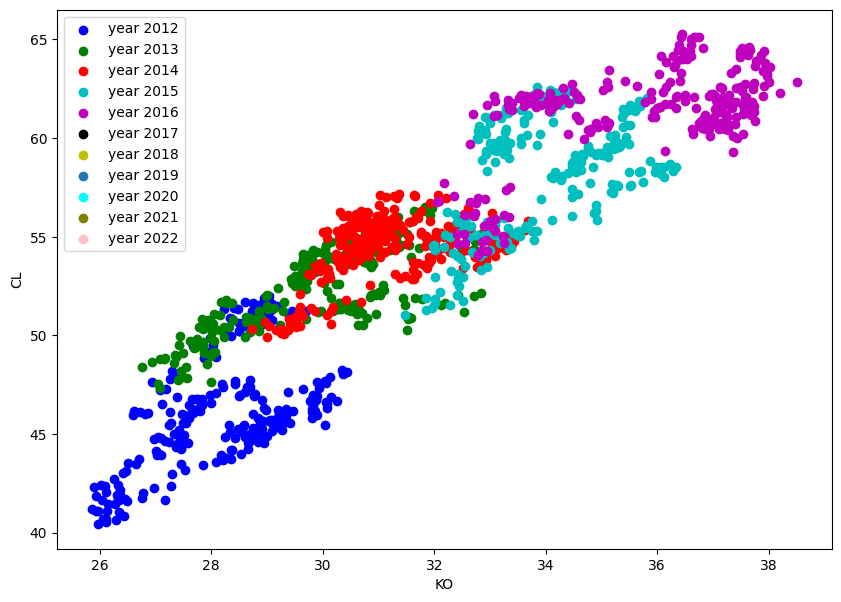

In [47]:
start_date = '20120101'
end_date = '20171231'
for pair in opt_pairs2:
    asset1 = pair[0]
    asset2 = pair[1]
    plot_pairs(asset1, asset2, start_date, end_date, prices_train)

In [43]:
asset1 = 'KO'
asset2 = 'CL'

price1 = df_price.loc[asset1, start_date:end_date]
price2 = df_price.loc[asset2, start_date:end_date]

results = sm.OLS(price1, price2).fit()
predict = results.predict(price2)
            
error = price1 - predict
ADFtest = ts.adfuller(error)

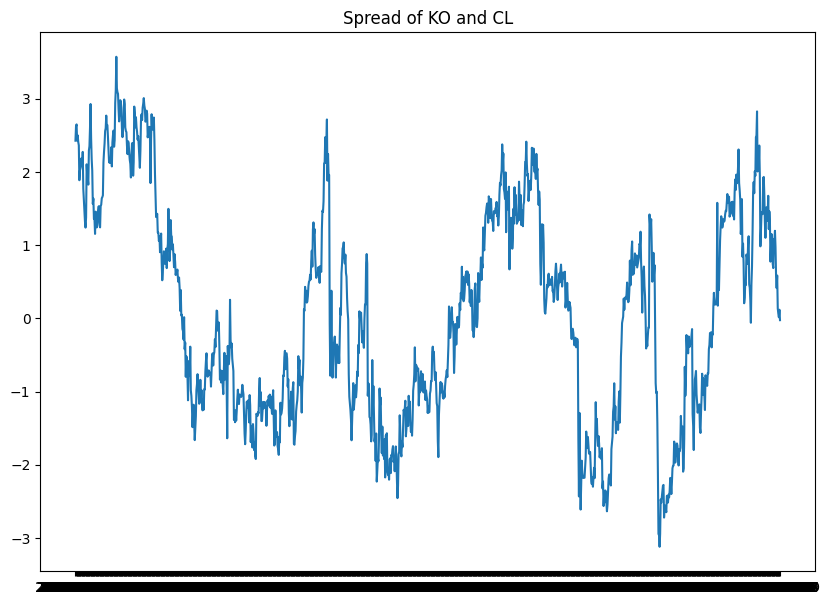

In [44]:
plt.figure(figsize = (10,7))
plt.title('Spread of KO and CL')
plt.plot(error)

In [45]:
print(ADFtest[1])

0.01660441166941158


In [50]:
pairs_list = [['KO', 'CL']]

In [51]:
total_set = pd.concat([prices_train, prices_test], axis=1)

In [52]:
total_set

date,2012-01-03,2012-01-04,2012-01-05,2012-01-06,2012-01-09,2012-01-10,2012-01-11,2012-01-12,2012-01-13,2012-01-17,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
AAPL,12.378491,12.396632,12.546302,12.692039,12.865290,12.877683,12.780021,12.767931,12.689922,12.825985,...,197.278264,195.840092,195.910021,196.649065,195.850088,194.931260,193.363270,192.244692,193.892582,193.652887
MSFT,21.026286,21.240113,21.683604,21.802395,22.214205,22.119175,21.723195,22.071655,22.119180,22.491396,...,365.513585,368.104095,370.136636,373.633885,371.202758,372.318708,373.633893,372.328655,374.002510,374.630212
NVDA,0.327909,0.322176,0.324010,0.337081,0.333641,0.338457,0.329055,0.326074,0.321029,0.319654,...,48.187781,49.393627,49.417622,49.648589,48.804703,49.188655,48.961680,49.504611,49.636596,49.806573
GOOG,16.244059,16.544838,16.472690,16.398553,16.083842,15.667131,15.511641,15.703702,15.580305,15.722610,...,132.768914,133.707841,137.843147,140.170488,140.609996,141.968444,142.817476,142.667655,141.688775,140.520090
GOOGL,16.321109,16.623314,16.550825,16.476335,16.160131,15.741444,15.585216,15.778187,15.654205,15.797185,...,131.469111,132.477954,136.683132,138.810694,139.330091,140.608629,141.427685,141.427679,140.618617,139.469933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STLA,1.726558,1.837578,1.837578,1.837578,1.883518,1.852892,1.898831,1.883517,1.875861,1.875861,...,21.993520,21.974802,21.740828,21.637880,21.731468,21.974801,21.890571,21.984159,22.012238,21.956083
CSX,5.790389,5.889533,6.018148,6.109249,6.119968,6.256623,6.248585,6.320933,6.251266,6.194994,...,33.532005,33.949167,34.078293,34.078291,34.207410,34.316668,34.396128,34.535185,34.485525,34.455721
APD,59.041012,58.788786,59.102349,59.197775,58.761542,59.334093,59.306843,60.322427,60.758650,61.419816,...,266.599877,269.854923,269.509711,267.901908,266.540685,269.036229,269.726732,270.476329,271.877025,270.654930
MRVL,12.102554,11.948376,12.393766,13.087545,13.601451,13.712799,13.190327,13.036152,12.933371,12.839155,...,59.536893,59.397153,59.506950,59.197541,59.137650,60.385280,60.544977,61.383384,61.273591,61.273595


In [53]:
def create_spread_function(a, b, start_t, end_t, alg='log'):
    """
    Apply the supervised machine learning to find the dynamics of spread

    Args:
        a, b: Stock A and B's price history
        start_t, end_t: start/end time of the analysis on the data. 
            They use the same unit with the data. For example, 0 means the 
            first data of the a and b. 
            (Analyze the data from a[start_t], b[start_t] to a[end_t], 
            b[end_t])
        alg: Type of algorithm. The 'log' means the log normalization
    Return:
        spread_func: The function of spread. 
            Output of this function is spread and z_score.
    """
    
    def log_spread_func(a, b):
        """
        Calculate the spread and z-score based on the log spread function.
        
        Args:
            a, b: Current stocks' prices
        Return:
            spread: The relation between a and b
            z-score: Normalized relation between a and b 
        """

        spread = math.log(b) - w_avg * math.log(a)
        z_score = spread/w_std

        return (spread, z_score)


    def lr_spread_func(a, b):
        """
        Calculate the spread and z-score based on the linear regression.
        
        Args:
            a, b: Current stocks' prices
        Return:
            spread: The relation between a and b
            z-score: Normalized relation between a and b 
        """

        # Change the a to polynomial form
        a, b = np.log(a), np.log(b)
        a = a * np.ones((1, 1))
        poly = PolynomialFeatures(degree = best_degree)
        a = poly.fit_transform(a)

        # Calculate the spread & z_score
        spread = b - regr.predict(a)
        z_score = spread/spread_std

        return (spread, z_score)

    # Slice the date
    target_a = a[start_t:end_t]
    target_b = b[start_t:end_t]

    # use the log function
    target_a = np.log(target_a)
    target_b = np.log(target_b)
    
    total_date = end_t-start_t

    # Find the coefficient of the log normalization
    if alg == 'log':

        # Calculate the weight
        w_list = target_b/target_a
        w_avg = np.average(w_list)

        # Calculate the standard deviation for the z-score calculation
        w_std = np.std(w_list)

        return log_spread_func

    # Find the coefficient of the linear regression
    elif alg == 'lr':

        # Initialization
        min_cv_n = float("inf")
        best_degree = 0
        total_len = target_a.size

        # Permute the a and b for training dataset & validation dataset
        permute_order = np.random.permutation(total_len)
        target_a = target_a[permute_order]
        target_b = target_b[permute_order]

        # Divide to train and validation datasets
        train_num = int(target_a.size/3*2)

        train_a = target_a[:train_num]
        train_b = target_b[:train_num]
        valid_a = target_a[train_num:]
        valid_b = target_b[train_num:]

        # Change the datasets from 1-D to 2-D
        train_a = train_a[:, np.newaxis]
        valid_a = valid_a[:, np.newaxis]

        # Find the best degree
        for degree in range(1, 10, 1):
            # Change the train datasets to polynomial form
            poly = PolynomialFeatures(degree = degree)
            poly_train_a = poly.fit_transform(train_a)
            poly_valid_a = poly.fit_transform(valid_a)

            # Train the model with Lasso linear regression
            # We used the Lasso instead fo Ridge because it's better
            # https://hackernoon.com/practical-machine-learning-ridge-regression-vs-lasso-a00326371ece
            regr = linear_model.LassoCV(cv=5)
            regr.fit(poly_train_a, train_b)

            # Calculate the error
            cv_n = np.average((valid_b - regr.predict(poly_valid_a))**2)

            # Check the best degree
            if cv_n < min_cv_n:
                best_degree = degree
                min_cv_n = cv_n

        if best_degree == 0:
            print("Cross-validation error")

        # Train again with the best degree
        poly = PolynomialFeatures(degree=best_degree)
        poly_train_a = poly.fit_transform(train_a)
        regr = linear_model.LassoCV(cv=5)
        regr.fit(poly_train_a, train_b)
        
        # Calculate the standard deviation of spread for the z-score calculation
        b_pred = regr.predict(poly_train_a)
        spread = train_b - b_pred
        spread_std = np.std(spread)

        return lr_spread_func


    print("Check the algorithm. Input was " + alg)

    pass

pairs = (['KO', 'CL'])



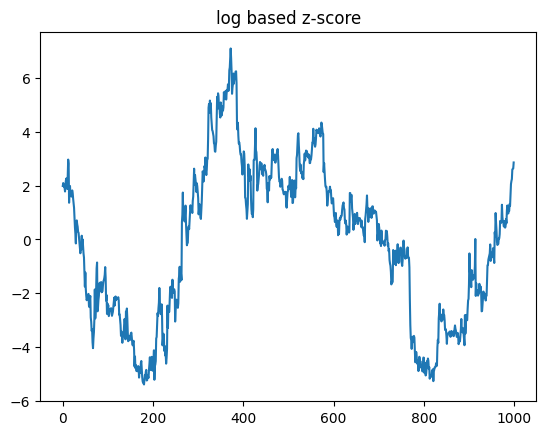

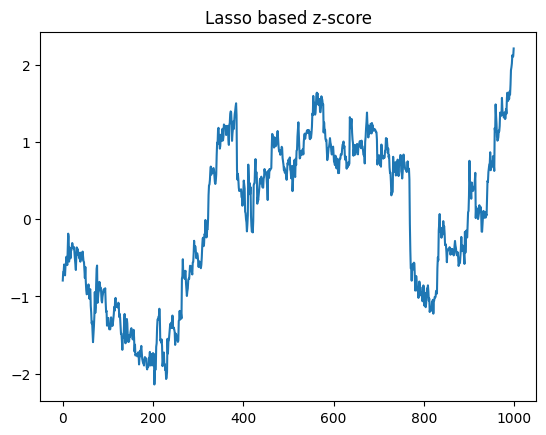

In [54]:
training_set_price = total_set

for i in range(len(pairs_list)):
    print("pairs = (" + str(pairs_list[i]) + ")\n")
    # Generate input for the test
    a = training_set_price.iloc[2*i].to_numpy()[1:]
    b = training_set_price.iloc[2*i+1].to_numpy()[1:]

    # Check the log based function on the log normalization
    spread_func = create_spread_function(a, b, 0, 1000, 'log')
    (spread, z_score) = spread_func(a[0], b[0])

    # Generate the graph about log based z_score
    x = np.arange(1000)
    z_score_history = np.zeros((1000))
    for i in range(1000):
        (spread, z_score_history[i]) = spread_func(a[i], b[i])
    plt.title('log based z-score')
    plt.plot(x, z_score_history)
    plt.show()

    # Check the Lasso based function on the linear regression
    spread_func = create_spread_function(a, b, 0, 1000, 'lr')
    (spread, z_score) = spread_func(a[0], b[0])

    # Generate the graph about log based z_score
    for i in range(1000):
        (spread, z_score_history[i]) = spread_func(a[i], b[i])
    plt.title('Lasso based z-score')
    plt.plot(x, z_score_history)
    plt.show()
    print("======================================================")

In [55]:
def gen_z_score_history(price_a, price_b, windows_width=700, spread_func_update_period=30):
    """
    Generate the z-scores history
    
    Args:
        price_a, price_b: stock's present price history dataset (T)
        windows_width: Width training data (day)
        spread_func_update_period: The period of spread function update (day)
    Return:
        z_score_list: z-score history (T-windows_width)
    """

    # Initialization
    T = len(price_a)
    z_score_list = np.zeros((T-windows_width))
    a = price_a
    b = price_b

    # Calculate the z_score one by one.
    for t in range(T-windows_width):

        # Generate the spread_function for every update_period
        if t % spread_func_update_period==0:
            spread_func = create_spread_function(
                a, b, t, t + windows_width, 'lr')
        
        # Generate the z-score with spread_function
        spread, z_score = spread_func(a[t], b[t])
        z_score_list[t] = z_score
    
    return z_score_list

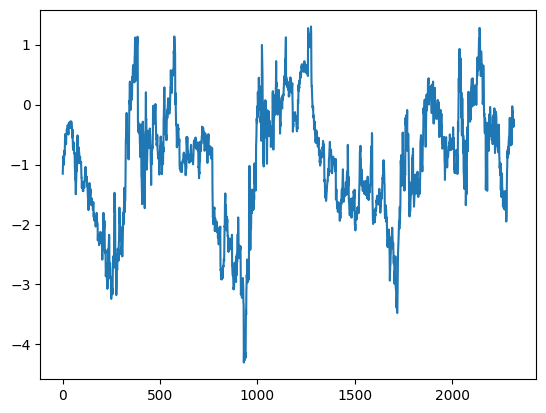

In [56]:
# Run the function with one stock pair.
price_history = training_set_price.to_numpy()[:2,1:]
z_score_history = gen_z_score_history(price_history[0], price_history[1])

# # Plot the graph.
x = np.arange(len(z_score_history))
plt.plot(x, z_score_history)
plt.show()

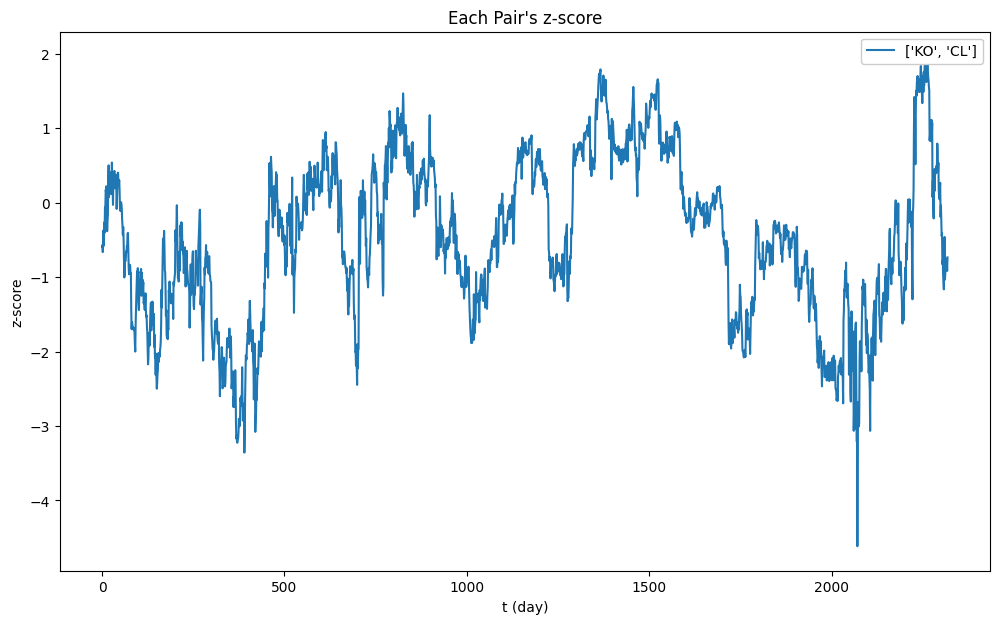

In [57]:
z_score_history_list = np.zeros((1, 1))
pairs_training_set = total_set

# Run the z_score_history generation function for each pair.
for pair in pairs_list:

    # Generate the price_history table for each pair.
    price_history_a = pairs_training_set.loc[pair[0]]
    price_history_a = price_history_a.iloc[:].to_numpy()
    price_history_b = pairs_training_set.loc[pair[1]]
    price_history_b = price_history_b.iloc[:].to_numpy()
    # print(price_history_a)
    

    # Run the z-score history generation function for each pair.
    try:
        z_score_history = gen_z_score_history(
            price_history_a, price_history_b)[np.newaxis]
        z_score_history_list = np.append(
            z_score_history_list, z_score_history, axis=0)
    except:
        z_score_history_list = gen_z_score_history(
            price_history_a, price_history_b)[np.newaxis]

plt.figure(figsize=(12, 7))
plt.title('Each Pair\'s z-score')
plt.ylabel('z-score')
plt.xlabel('t (day)')
x = np.arange(z_score_history_list[0].shape[0])
for i, pair in enumerate(pairs_list):
    plt.plot(x, z_score_history_list[i], label=str(pair))
plt.legend(framealpha=1, frameon=True, loc=1)
plt.savefig('each_pair_z_score.png')
plt.show()

with open('z_score_history.npy', 'wb') as outfile:
    np.save(outfile, z_score_history_list)

In [58]:
class Backtesting():
    """
    Run the backtesting and track the total asset history
    """

    def __init__(self, z_score_list, stop_loss=3, buy_z=2, sell_z=-0.5, 
                 total_money=100000):
        self.pairs_num = z_score_list.shape[0]
        self.total_time = z_score_list.shape[1]
        self.stop_loss = stop_loss
        self.buy_z = buy_z
        self.sell_z = sell_z

        self.inverse_price = np.zeros((2 * self.pairs_num))
        self.total_stock = np.zeros((2 * self.pairs_num))
        self.total_inverse = np.zeros((2 * self.pairs_num))
        self.money_for_pair = int(total_money/self.pairs_num) * \
            np.ones((self.pairs_num))

    def trade_decision(self, z_score, pair_num):
        """
        Decide whether we will buy/sell the stock/inverse.
        It is decided by z-score.

        Args:
            z_score: scalar z_score value
            pair_num: pair's number
        Return:
            stock: buy(+1), sell(-1), stop_loss(-2)
            inverse: buy(+1), sell(-1), stop_loss(-2)
        """

        stop_loss = self.stop_loss
        buy_z = self.buy_z
        sell_z = self.sell_z
        total_stock = self.total_stock[2 * pair_num]
        total_inverse = self.total_inverse[2 * pair_num]
        stock, inverse = 0, 0

        # Need to sell everything to stop loss
        if z_score >= stop_loss or z_score <= -1*stop_loss:
            stock, inverse = -2, -2

        # If the z-score is over the buy_z, buy the stock a
        elif z_score >= buy_z and total_stock == 0:
            stock, inverse = 1, 0
        
        # If the z-score below sell_z, sell all the stocks to make profit 
        elif z_score <= sell_z and total_stock > 0:
            stock, inverse = -1, 0

        # If the z-score below -1 * buy_z, buy the inverse a
        elif z_score <= -1 * buy_z and total_inverse == 0:
            stock, inverse = 0, 1

        # If the z-score above -1 * sell_z, sell the inverse a to make profit
        elif z_score >= -1 * sell_z and total_inverse > 0:
            stock, inverse = 0, -1
        
        return stock, inverse


    def cal_trade_vol(self, stock_num, stock_signal, inv_signal, current_price):
        """
        Calculate the volume of trade we will trade

        Args:
            stock_num: Personal number to distinguish the stocks
            stock_signal: Signal to trade the stock (+: buy, -: sell)
            inv_signal: Signal to trade the inverse (+: buy, -: sell)
            current_price: current price to calculate how many stock we will 
                trade
        Return:
            trade_stock_vol: Volume of stock to buy(+) or sell(-)
            trade_inverse_vol: Volume of inverse to buy(+) or sell(-)
        """

        # Initialization
        trade_stock_vol = 0
        trade_inverse_vol = 0

        # Calculate how much money we will use for this stock
        money_for_stock = self.money_for_pair[int(stock_num/2)] / 2

        # Sell the stock if the stock_signal < 0
        if stock_signal < 0:
            trade_stock_vol = -1 * self.total_stock[stock_num]

        # Buy the stock if the stock_signal > 0
        elif stock_signal > 0:
            trade_stock_vol = int(money_for_stock/current_price)

        # Sell the inverse if the inverse_signal < 0
        if inv_signal < 0:
            trade_inverse_vol = -1 * self.total_inverse[stock_num]

        # Buy the stock if the inverse_signal > 0
        elif inv_signal > 0:
            trade_inv_vol = int(money_for_stock/current_price)

        return trade_stock_vol, trade_inverse_vol
        
    def cal_result(self, stock_num, stock_vol, inverse_vol, prev_price, current_price):
        """
        Calculate the each stock's trade results

        Args:
            stock_num: Personal number to distinguish the stocks
            stock_vol: Volume of stock to buy(+) or sell(-)
            inverse_vol: Volume of inverse to buy(+) or sell(-)
            prev_price: Price of the stock the day before.
            current_price: Price of the stock today.
        Return:
            total_asset: Sum of all the assets today.
        """

        # Update the price of current inverse
        if self.total_inverse[stock_num] > 0:
            change_ratio = (current_price - prev_price) / prev_price
            self.inverse_price[stock_num] = (1 - change_ratio) * self.inverse_price[stock_num]
        
        # Buy the stock
        if stock_vol > 0:
            self.total_stock[stock_num] += stock_vol
            self.money_for_pair[int(stock_num/2)] -= stock_vol * current_price

        # Sell the stock
        elif stock_vol < 0:
            self.total_stock[stock_num] += stock_vol
            self.money_for_pair[int(stock_num/2)] -= stock_vol * current_price
        
        # Buy the inverse
        if inverse_vol > 0:
            self.total_inverse[stock_num] += inverse_vol
            self.money_for_pair[int(stock_num/2)] -= inverse_vol * current_price
            self.inverse_price[stock_num] = current_price
        
        # Sell the inverse
        if inverse_vol < 0:
            self.total_inverse[stock_num] += inverse_vol
            self.money_for_pair[int(stock_num/2)] -= inverse_vol * self.inverse_price[stock_num]
            self.inverse_price[stock_num] = 0

        total_asset = (self.total_inverse[stock_num] * self.inverse_price[stock_num] + 
                          self.total_stock[stock_num] * current_price)

        return total_asset


    def backtesting(self, z_score_list, price_list):
        """
        Args:
            z_score_list: list of z-score history (NxT).
            price_list: list of price history (2NxT).
        Return:
            final asset history
        """

        total_asset = np.zeros((self.pairs_num, self.total_time))
        # print(self.total_time);

        for t in range(self.total_time):
            for pair_num in range(self.pairs_num):
                stock_a_num = 2*pair_num
                stock_b_num = 2*pair_num+1
                z_score = z_score_list[pair_num]
            
                # Decide whether buy or sell stock a.
                stock_a, inverse_a = self.trade_decision(
                    z_score[t], pair_num)
                stock_b = inverse_a
                inverse_b = stock_a

                # Calculate the buy/sell volume
                stock_a_vol, inverse_a_vol = self.cal_trade_vol(
                    stock_a_num, stock_a, inverse_a, price_list[stock_a_num][t])
                stock_b_vol, inverse_b_vol = self.cal_trade_vol(
                    stock_b_num, stock_b, inverse_b, price_list[stock_b_num][t])

                # Calculate the trade result
                total_asset[pair_num][t] += self.cal_result(stock_a_num, stock_a_vol, 
                                                  inverse_a_vol, 
                                                  price_list[stock_a_num][t-1], 
                                                  price_list[stock_a_num][t])
                
                total_asset[pair_num][t] += self.cal_result(stock_b_num, stock_b_vol,
                                                     inverse_b_vol, 
                                                     price_list[stock_b_num][t-1], 
                                                     price_list[stock_b_num][t])

                total_asset[pair_num][t] += self.money_for_pair[int(pair_num)]

        return total_asset

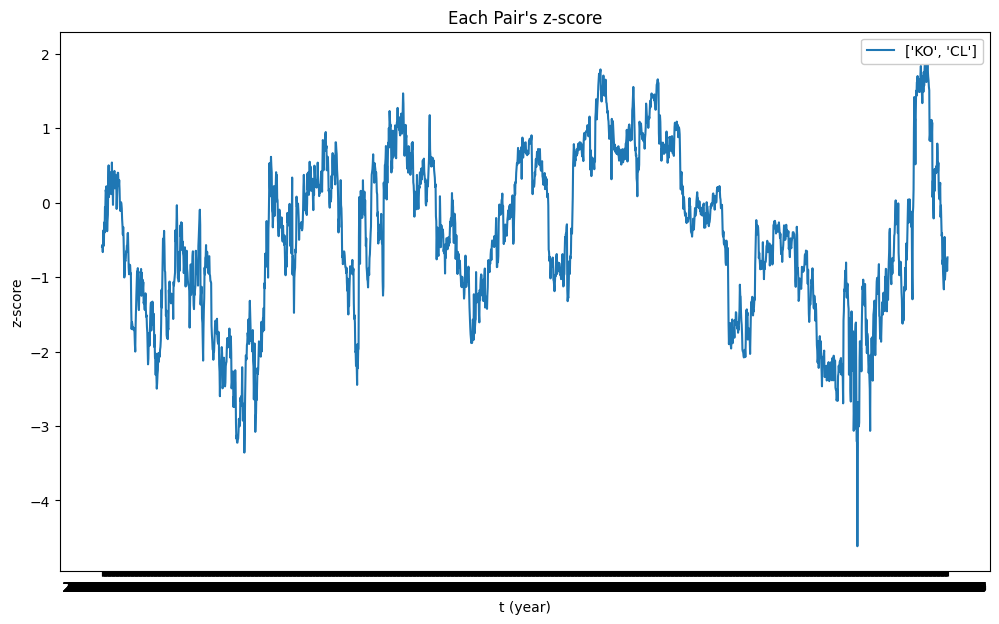

[[100000.         100000.         100000.         ... 814185.79700994
  801962.47320258 796718.98900216]]


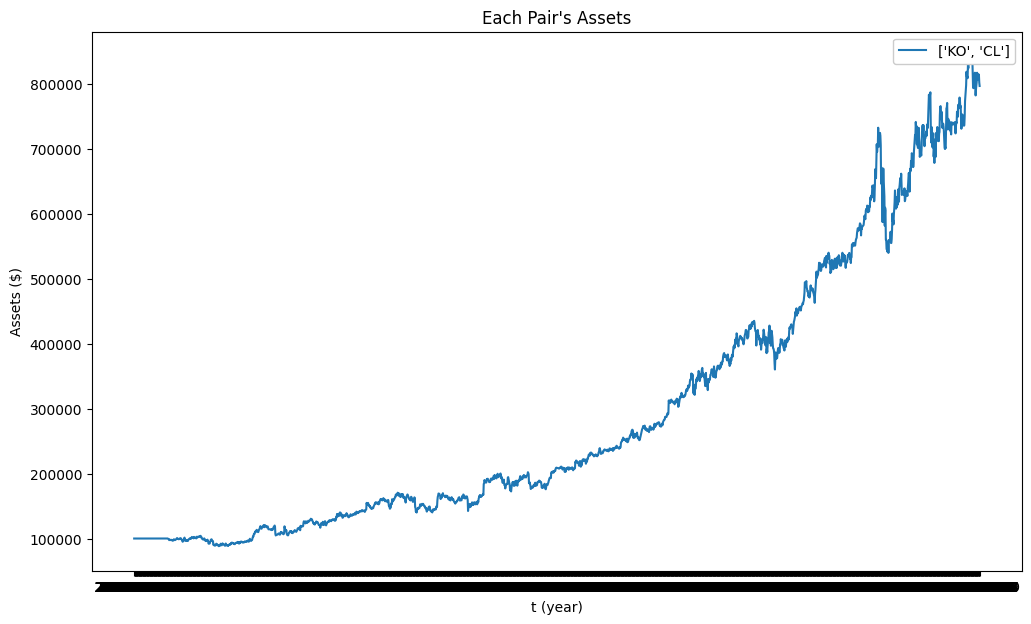

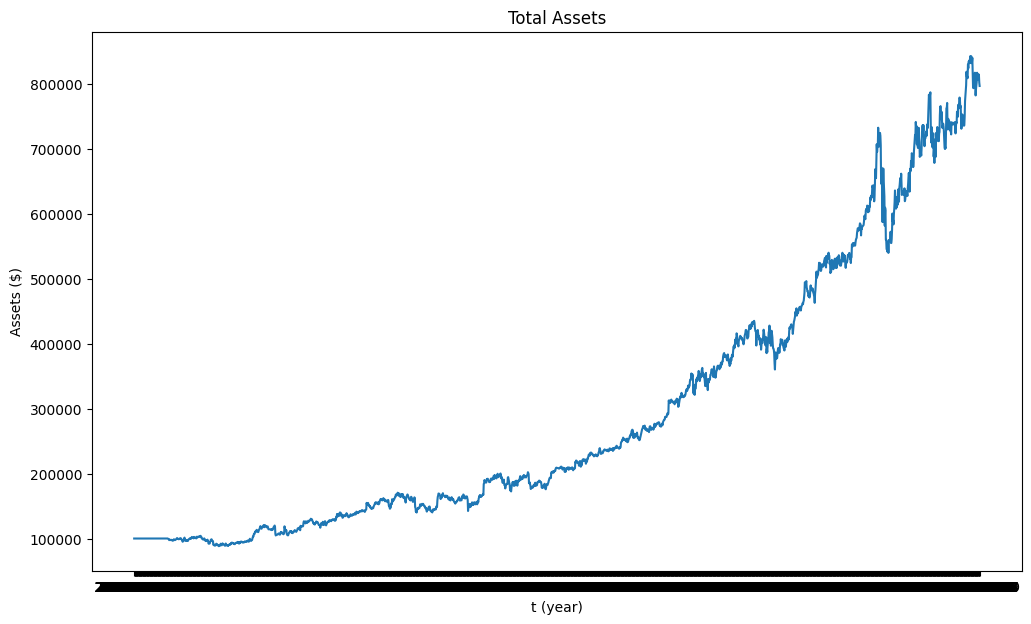

Total earning ratio: 7.967189890021562


In [61]:

# Read the z-score history list.
with open('z_score_history.npy', 'rb') as infile:
    z_score_list = np.load(infile)
    z_score_list = z_score_list[:len(pairs_list)]

price_list = training_set_price.to_numpy()[:, :3018]


# Initial money is $100000.
initial_money = 100000

# Run the backtesting code
BT = Backtesting(z_score_list, total_money = initial_money)
asset_per_pair = BT.backtesting(z_score_list, price_list)

# Plot the graphs about results
x = np.arange(z_score_list.shape[1])
x = training_set_price.columns[:2318]

# Graph about each pair's z-score
plt.figure(figsize=(12, 7))
plt.title('Each Pair\'s z-score')
plt.ylabel('z-score')
plt.xlabel('t (year)')
for i, pair in enumerate(pairs_list):
    plt.plot(x, z_score_list[i], label=str(pair))
plt.legend(framealpha=1, frameon=True, loc=1)
plt.savefig('each_pair_z_score.png')
plt.show()

print(asset_per_pair)

# Graph about each pair's assets
plt.figure(figsize=(12, 7))
plt.title('Each Pair\'s Assets')
plt.ylabel('Assets ($)')
plt.xlabel('t (year)')
for i, pair in enumerate(pairs_list):
    plt.plot(x, asset_per_pair[i], label=str(pair))
plt.legend(framealpha=1, frameon=True, loc=1)
plt.savefig('each_pair_assets.png')
plt.show()

# Graph about total asset
plt.figure(figsize=(12, 7))
plt.title('Total Assets')
plt.ylabel('Assets ($)')
plt.xlabel('t (year)')
total_asset = np.sum(asset_per_pair, axis=0)
plt.plot(x, total_asset)
plt.savefig('total_assets.png')
plt.show()

# Calculate the total earning
total_earning_ratio = total_asset[-1] / initial_money
print("Total earning ratio: " + str(total_earning_ratio))

# Save the total assets
total_asset_history = pd.DataFrame(
    total_asset,
    index=x,
    columns=['total assets']
)
total_asset_history.to_csv('total_asset_history.csv', index=True)